In [1]:
!pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  # Changed to California Housing dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
california = fetch_california_housing()
data = pd.DataFrame(california.data)

# Add feature names to the dataframe
data.columns = california.feature_names
data['PRICE'] = california.target

In [5]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [6]:
x = data.drop(['PRICE'], axis=1)
y = data['PRICE']

# Split data into training and testing datasets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)

# Predict for training and testing data
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [8]:
df_train = pd.DataFrame({'Actual': ytrain, 'Predicted': ytrain_pred})
df_test = pd.DataFrame({'Actual': ytest, 'Predicted': ytest_pred})

# Calculate Mean Squared Error for both train and test sets
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)

In [9]:
print(f"Training Mean Squared Error: {mse_train}")
print(f"Testing Mean Squared Error: {mse_test}")

Training Mean Squared Error: 0.5234413607125449
Testing Mean Squared Error: 0.5289841670367219


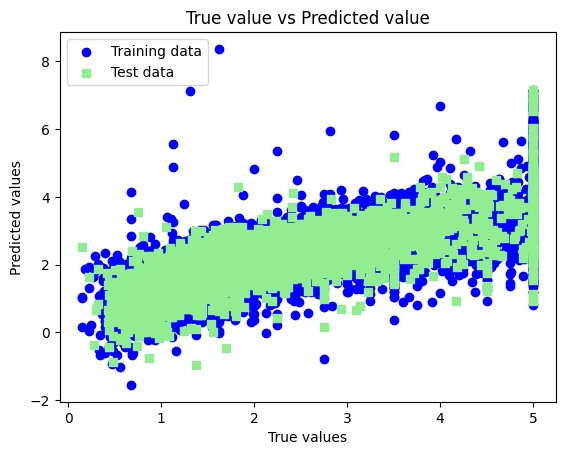

In [10]:
plt.scatter(ytrain, ytrain_pred, c='blue', marker='o', label='Training data')
plt.scatter(ytest, ytest_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')
plt.show()

In [11]:
r2_train = r2_score(ytrain, ytrain_pred)
r2_test = r2_score(ytest, ytest_pred)
print(f"R² Score for Training Data: {r2_train}")
print(f"R² Score for Testing Data: {r2_test}")


R² Score for Training Data: 0.6088968118672868
R² Score for Testing Data: 0.5943232652466195
